In [12]:
import os, getpass
from dotenv import load_dotenv

load_dotenv("../../.env")

True

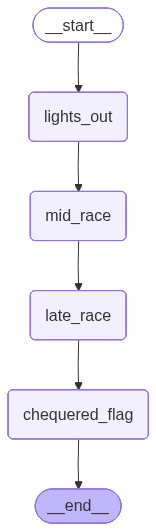

In [1]:
from IPython.display import Image, display

from typing import Any
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

class RaceState(TypedDict):
    race_report: str

class ReportUpdate:
    def __init__(self, update_message: str):
        self._value = update_message

    def __call__(self, state: RaceState) -> Any:
        print(f"Adding: {self._value}")
        return {"race_report": [self._value]}

builder = StateGraph(RaceState)

builder.add_node("lights_out", ReportUpdate("Lights Out!"))
builder.add_node("mid_race", ReportUpdate("Verstappen pits for Hards"))
builder.add_node("late_race", ReportUpdate("Leclerc attacks on new Mediums"))
builder.add_node("chequered_flag", ReportUpdate("Chequered Flag!"))

builder.add_edge(START, "lights_out")
builder.add_edge("lights_out", "mid_race")
builder.add_edge("mid_race", "late_race")
builder.add_edge("late_race", "chequered_flag")
builder.add_edge("chequered_flag", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [2]:
graph.invoke({"state": []})

Adding: Lights Out!
Adding: Verstappen pits for Hards
Adding: Leclerc attacks on new Mediums
Adding: Chequered Flag!


{'race_report': ['Chequered Flag!']}

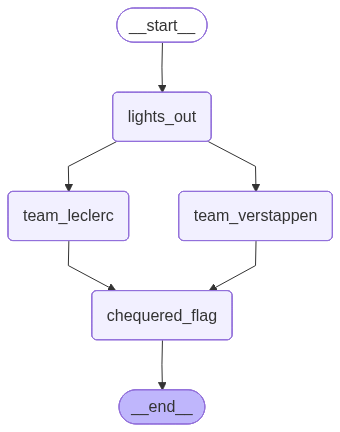

In [3]:
builder = StateGraph(RaceState)

builder.add_node("lights_out", ReportUpdate("Lights Out!"))
builder.add_node("team_verstappen", ReportUpdate("Verstappen pits for Hards"))
builder.add_node("team_leclerc", ReportUpdate("Leclerc pits for Mediums"))
builder.add_node("chequered_flag", ReportUpdate("Chequered Flag!"))

builder.add_edge(START, "lights_out")
builder.add_edge("lights_out", "team_verstappen")
builder.add_edge("lights_out", "team_leclerc")
builder.add_edge("team_verstappen", "chequered_flag")
builder.add_edge("team_leclerc", "chequered_flag")
builder.add_edge("chequered_flag", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [4]:
from langgraph.errors import InvalidUpdateError
try:
    graph.invoke({"race_report": []})
except InvalidUpdateError as e:
    print(f"An error occurred: {e}")

Adding: Lights Out!
Adding: Leclerc pits for Mediums
Adding: Verstappen pits for Hards
An error occurred: At key 'race_report': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://docs.langchain.com/oss/python/langgraph/errors/INVALID_CONCURRENT_GRAPH_UPDATE


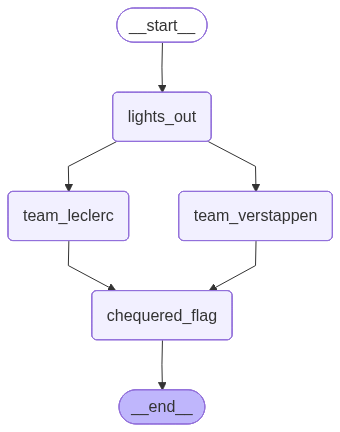

In [5]:
import operator
from typing import Annotated

class RaceState(TypedDict):
    race_report: Annotated[list, operator.add]

builder = StateGraph(RaceState)

builder.add_node("lights_out", ReportUpdate("Lights Out!"))
builder.add_node("team_verstappen", ReportUpdate("Verstappen pits for Hards"))
builder.add_node("team_leclerc", ReportUpdate("Leclerc pits for Mediums"))
builder.add_node("chequered_flag", ReportUpdate("Chequered Flag!"))

builder.add_edge(START, "lights_out")
builder.add_edge("lights_out", "team_verstappen")
builder.add_edge("lights_out", "team_leclerc")
builder.add_edge("team_verstappen", "chequered_flag")
builder.add_edge("team_leclerc", "chequered_flag")
builder.add_edge("chequered_flag", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
graph.invoke({"state": []})

Adding: Lights Out!
Adding: Leclerc pits for Mediums
Adding: Verstappen pits for Hards
Adding: Chequered Flag!


{'race_report': ['Lights Out!',
  'Leclerc pits for Mediums',
  'Verstappen pits for Hards',
  'Chequered Flag!']}

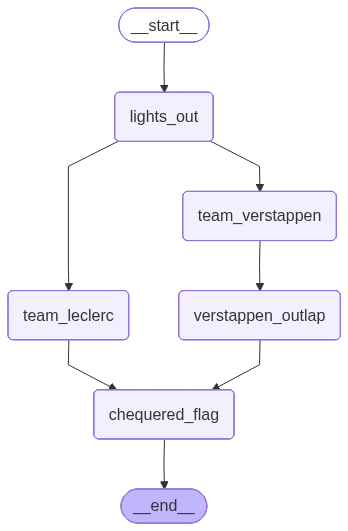

In [7]:
builder = StateGraph(RaceState)

builder.add_node("lights_out", ReportUpdate("Lights Out!"))
builder.add_node("team_verstappen", ReportUpdate("Verstappen pits for Hards"))
builder.add_node("verstappen_outlap", ReportUpdate("Verstappen sets fastest lap on outlap"))
builder.add_node("team_leclerc", ReportUpdate("Leclerc pits for Mediums"))
builder.add_node("chequered_flag", ReportUpdate("Chequered Flag!"))

builder.add_edge(START, "lights_out")
builder.add_edge("lights_out", "team_verstappen")
builder.add_edge("lights_out", "team_leclerc")
builder.add_edge("team_verstappen", "verstappen_outlap")
builder.add_edge(["verstappen_outlap", "team_leclerc"], "chequered_flag")
builder.add_edge("chequered_flag", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
graph.invoke({"state": []})

Adding: Lights Out!
Adding: Leclerc pits for Mediums
Adding: Verstappen pits for Hards
Adding: Verstappen sets fastest lap on outlap
Adding: Chequered Flag!


{'race_report': ['Lights Out!',
  'Leclerc pits for Mediums',
  'Verstappen pits for Hards',
  'Verstappen sets fastest lap on outlap',
  'Chequered Flag!']}

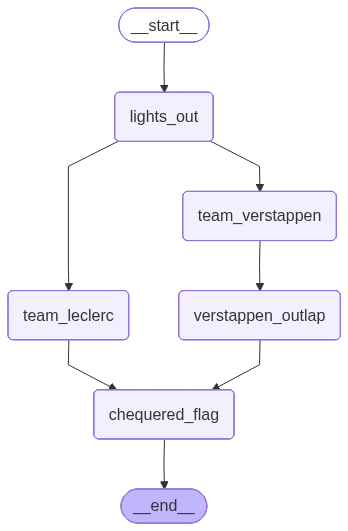

In [9]:
def sorting_reducer(left, right):
    """Combines and sorts the values in a list."""
    if not isinstance(left, list):
        left = [left]

    if not isinstance(right, list):
        right = [right]

    return sorted(left + right, reverse=False)

class RaceState(TypedDict):
    race_report: Annotated[list, sorting_reducer]

builder = StateGraph(RaceState)

builder.add_node("lights_out", ReportUpdate("Lights Out!"))
builder.add_node("team_verstappen", ReportUpdate("Verstappen pits for Hards"))
builder.add_node("verstappen_outlap", ReportUpdate("Verstappen sets fastest lap on outlap"))
builder.add_node("team_leclerc", ReportUpdate("Leclerc pits for Mediums"))
builder.add_node("chequered_flag", ReportUpdate("Chequered Flag!"))

builder.add_edge(START, "lights_out")
builder.add_edge("lights_out", "team_verstappen")
builder.add_edge("lights_out", "team_leclerc")
builder.add_edge("team_verstappen", "verstappen_outlap")
builder.add_edge(["verstappen_outlap", "team_leclerc"], "chequered_flag")
builder.add_edge("chequered_flag", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
graph.invoke({"state": []})

Adding: Lights Out!
Adding: Leclerc pits for Mediums
Adding: Verstappen pits for Hards
Adding: Verstappen sets fastest lap on outlap
Adding: Chequered Flag!


{'race_report': ['Chequered Flag!',
  'Leclerc pits for Mediums',
  'Lights Out!',
  'Verstappen pits for Hards',
  'Verstappen sets fastest lap on outlap']}

In [13]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4.1-nano", temperature=0)

In [14]:
class ReportState(TypedDict):
    question: str
    answer: str
    context: Annotated[list, operator.add]

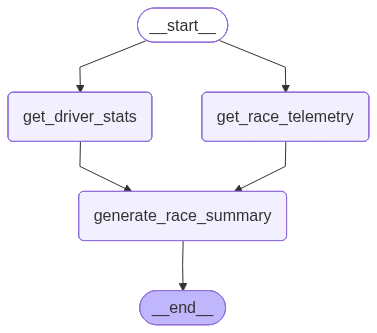

In [15]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_community.document_loaders import WikipediaLoader
from langchain_community.tools import TavilySearchResults

def get_race_telemetry(state):
    """Retrieve live race telemetry and web reports."""
    tavily_search = TavilySearchResults(max_results=3)
    search_docs = tavily_search.invoke(state['question'])
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}">\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )
    return {"context": [formatted_search_docs]}

def get_driver_stats(state):
    """Retrieve driver historical stats from Wikipedia."""
    search_docs = WikipediaLoader(query=state['question'],
                                  load_max_docs=2).load()
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}">\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ]
    )
    return {"context": [formatted_search_docs]}

def generate_race_summary(state):
    """Generate a summary of the race based on context."""
    context = state["context"]
    question = state["question"]
    answer_template = """Answer the question {question} using this context: {context}"""
    answer_instructions = answer_template.format(question=question,
                                                       context=context)
    answer = llm.invoke([SystemMessage(content=answer_instructions)]+[HumanMessage(content=f"Answer the question.")])
    return {"answer": answer}

builder = StateGraph(ReportState)

builder.add_node("get_race_telemetry", get_race_telemetry)
builder.add_node("get_driver_stats", get_driver_stats)
builder.add_node("generate_race_summary", generate_race_summary)

builder.add_edge(START, "get_driver_stats")
builder.add_edge(START, "get_race_telemetry")
builder.add_edge("get_driver_stats", "generate_race_summary")
builder.add_edge("get_race_telemetry", "generate_race_summary")
builder.add_edge("generate_race_summary", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
result = graph.invoke({"question": "How did Max Verstappen do at the 2023 Monaco GP?"})
result['answer'].content

/var/folders/1f/vl83__r51wd66hnxlnlgncx00000gn/T/ipykernel_1705/1397691079.py:7: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults(max_results=3)


'Max Verstappen performed exceptionally well at the 2023 Monaco Grand Prix, winning the race from pole position. It was his second victory at Monaco and his fourth of the 2023 season, extending his lead in the Formula One championship. Despite some challenging moments, such as locking his rear tires and hitting barriers during the race, Verstappen managed to master the circuit and finished 28 seconds ahead of Fernando Alonso.'

In [17]:
if 'google.colab' in str(get_ipython()):
    raise Exception("Unfortunately LangGraph Studio is currently not supported on Google Colab")

In [18]:
from langgraph_sdk import get_client
client = get_client(url="http://127.0.0.1:2024")

In [21]:
thread = await client.threads.create()

input_question = {"question": "How did Max Verstappen do at the 2023 Monaco GP?"}

async for event in client.runs.stream(
    thread["thread_id"],
    assistant_id="parallelization",
    input=input_question,
    stream_mode="values"
):
    if event.data is not None:
        answer = event.data.get('answer', None)

        if answer:
            print(answer)

{'content': "Max Verstappen won the 2023 Monaco Grand Prix. He started from pole position and managed to maintain his lead throughout the race, finishing 28 seconds ahead of Fernando Alonso, who came in second. This victory marked Verstappen's second win at the Monaco Grand Prix and his fourth win of the 2023 season, further extending his lead in the Formula One championship. Despite some challenging moments, such as locking his rear tires and hitting the barriers, Verstappen successfully navigated the race and set a record for his team with his 39th win, surpassing Sebastian Vettel's record.", 'additional_kwargs': {'refusal': None}, 'response_metadata': {'token_usage': {'completion_tokens': 119, 'prompt_tokens': 2798, 'total_tokens': 2917, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': '